In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
RED = "#ff5757"
GREEN = "#7ed957"
BLACK = "#262626"
mpl.rcParams.update({
    "text.color": "white",
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "#262626",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "#262626",
    "figure.edgecolor": "black",
    "savefig.facecolor": "#262626",
    "savefig.edgecolor": "black"})

# Bagging

In [3]:
def plot_dataset(X, y, **kwargs):
    COLORS = np.array([RED, GREEN])
    a = X[:,0]
    b = X[:,1]
    plt.scatter(a, b, c=COLORS[y])
    plt.xlabel(kwargs.get("xlabel"))
    plt.ylabel(kwargs.get("ylabel"))
    plt.axis(kwargs.get("axis"))

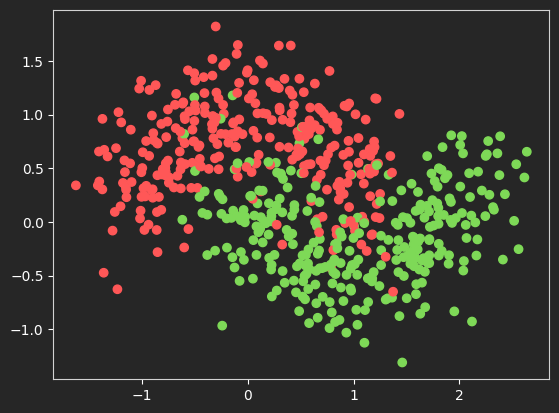

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=600, noise=0.30, random_state=42)
plot_dataset(X, y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),# model to use
    n_estimators=400,        # number of models/predictors
    max_samples=100,         # instances in each sample
    bootstrap=True,          # True for Bagging, False for Pasting
    n_jobs=-1                # use all available cores for training
)

In [7]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [8]:
def plot_decision_boundaries(clf, X, y):
    X1_mesh = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
    X2_mesh = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
    X1, X2 = np.meshgrid(X1_mesh, X2_mesh)
    y_pred = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = y_pred.reshape(X1.shape)
    colors = ListedColormap([RED,"#ffffff",GREEN])
    plt.contourf(X1, X2, Z, alpha=0.3, cmap=colors)

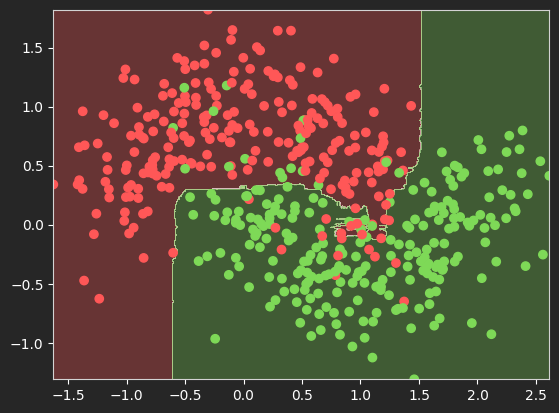

In [9]:
plot_decision_boundaries(bag_clf, X_train, y_train)
plot_dataset(X_train, y_train)

In [10]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier()

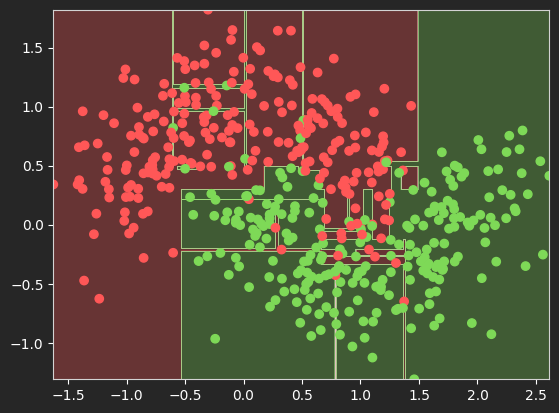

In [11]:
plot_decision_boundaries(dec_clf, X_train, y_train)
plot_dataset(X_train, y_train)

# Out of Bag Evaluation

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [13]:
bag_clf.oob_score_ # oob score

0.9041666666666667

In [14]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)

# (Close enough to oob score)
accuracy_score(y_test, y_pred) # accuracy score  

0.9083333333333333

# Random Forests

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1
)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [16]:
y_pred_forest = forest_clf.predict(X_test)

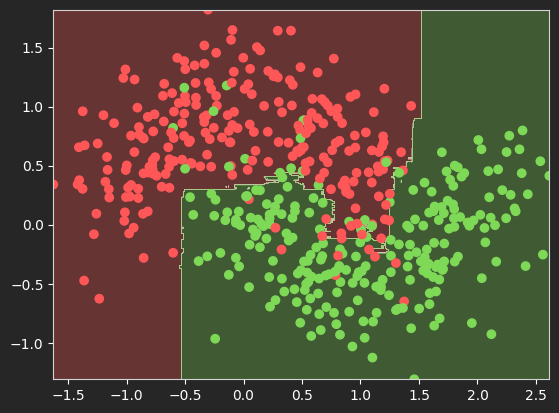

In [17]:
plot_decision_boundaries(forest_clf, X_train, y_train)
plot_dataset(X_train, y_train)

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    n_jobs=-1
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [19]:
y_pred_bag = bag_clf.predict(X_test)

In [20]:
print(f"RandomForest Accuracy: {accuracy_score(y_test, y_pred_forest):.2f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bag):.2f}")

RandomForest Accuracy: 0.88
Bagging Accuracy: 0.87


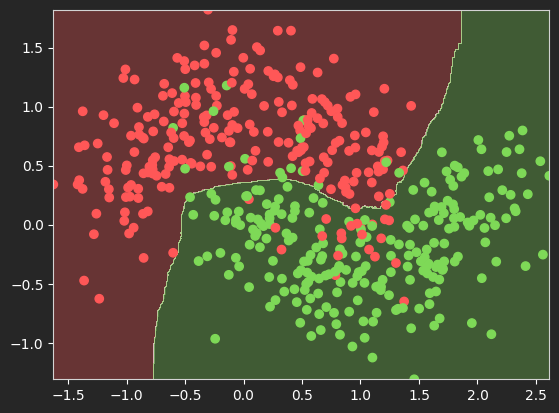

In [21]:
plot_decision_boundaries(bag_clf, X_train, y_train)
plot_dataset(X_train, y_train)

# Boosting

## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [23]:
ada_clf.score(X_test, y_test)

0.875

## Gradient Boosting

#### Dataset

In [24]:
X = 4*np.random.rand(100, 1) - 2
y = 0.5*X**2 + np.random.rand(100, 1)

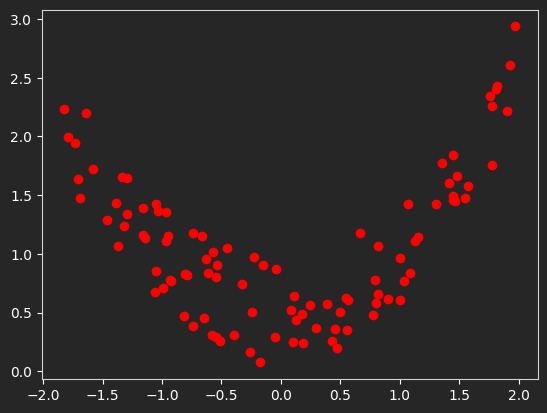

In [25]:
plt.plot(X, y, 'ro')

In [26]:
def reg_dec_boundary(clf, X):
    X = np.linspace(-2, 2, 100).reshape(-1, 1)
    y_pred = clf.predict(X)
    plt.plot(X, y_pred, 'w-')

#### Custom GBRT

(-2.0, 2.0, 0.0, 3.0)

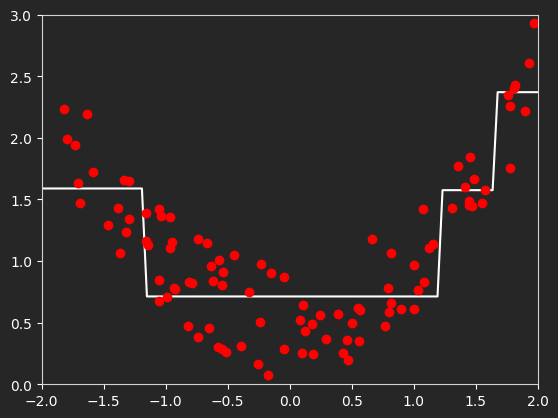

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X, y)
y1 = tree1.predict(X).reshape(-1, 1)

# plot decision boundaries
reg_dec_boundary(tree1, X)
plt.plot(X, y, 'ro')
plt.axis([-2, 2, 0, 3])

(-2.0, 2.0, -2.0, 2.0)

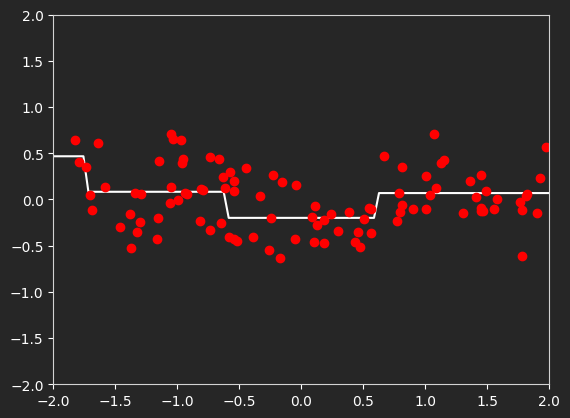

In [28]:
y2 = y - y1
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X, y2)
y3 = tree2.predict(X).reshape(-1, 1)

reg_dec_boundary(tree2, X)
plt.plot(X, y2, 'ro')
plt.axis([-2, 2, -2, 2])

(-2.0, 2.0, -2.0, 2.0)

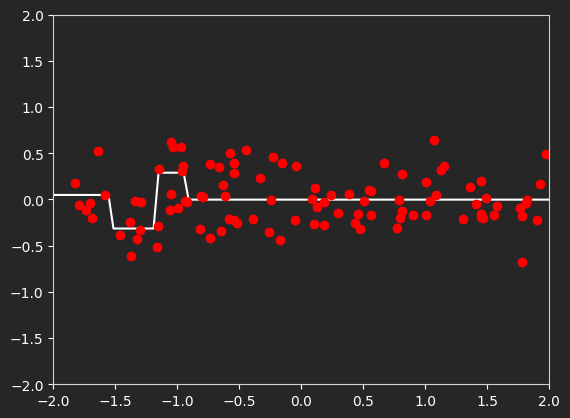

In [29]:
y4 = y2 - y3
tree3 = DecisionTreeRegressor(max_depth=2)
tree3.fit(X, y4)
y5 = tree3.predict(X).reshape(-1, 1)

reg_dec_boundary(tree3, X)
plt.plot(X, y4, 'ro')
plt.axis([-2, 2, -2, 2])

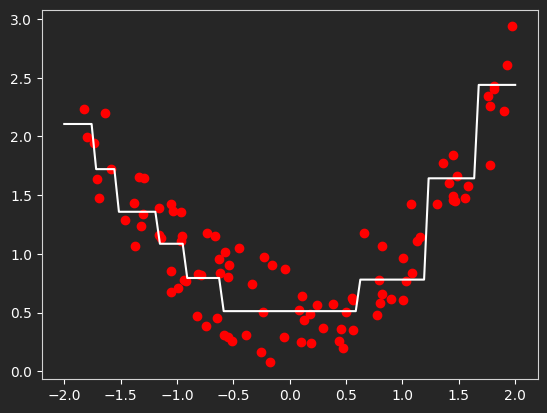

In [30]:
X_pred = np.linspace(-2, 2, 100).reshape(-1, 1)
y_pred = sum(tree.predict(X_pred) for tree in (tree1, tree2, tree3)).reshape(-1, 1)

plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred, 'w-')

#### Using Sklearn's GBRT

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.7)
gbr.fit(X, y)

/home/shaker/.local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.7, max_depth=2, n_estimators=3)

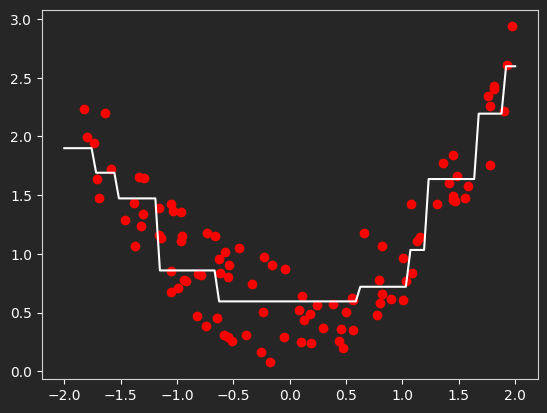

In [32]:
X_pred = np.linspace(-2, 2, 100).reshape(-1, 1)
y_pred_gbr = gbr.predict(X_pred)
plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred_gbr, 'w-')

#### GBRT Learning Rate

/home/shaker/.local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


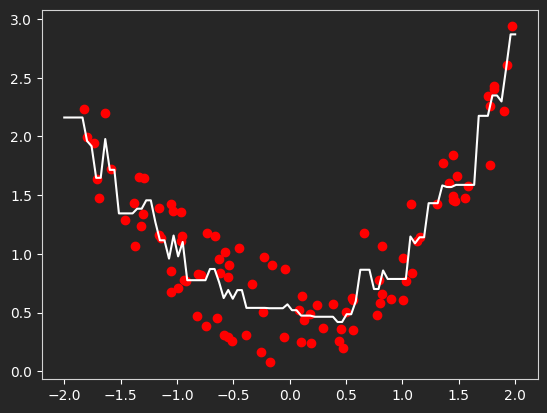

In [33]:
gbr1 = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1)
gbr1.fit(X, y)
y_pred_gbr1 = gbr1.predict(X_pred)
plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred_gbr1, 'w-')

/home/shaker/.local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


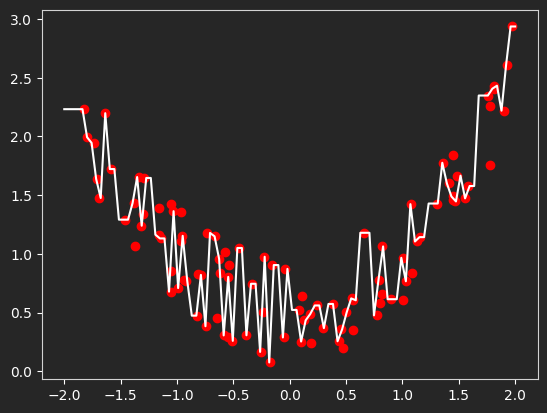

In [34]:
gbr2 = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1)
gbr2.fit(X, y)
y_pred_gbr2 = gbr2.predict(X_pred)
plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred_gbr2, 'w-')

#### GBRT Predictors

/home/shaker/.local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


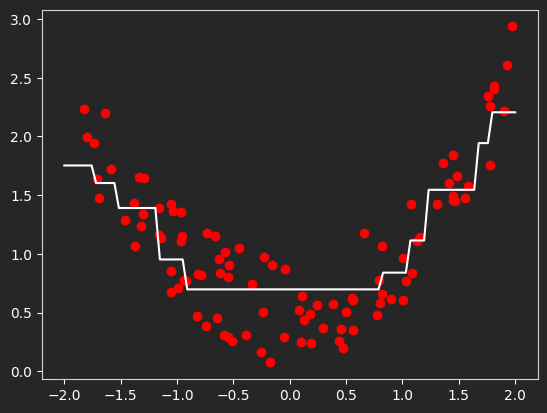

In [35]:
gbr1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.5)
gbr1.fit(X, y)
y_pred_gbr1 = gbr1.predict(X_pred)
plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred_gbr1, 'w-')

/home/shaker/.local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


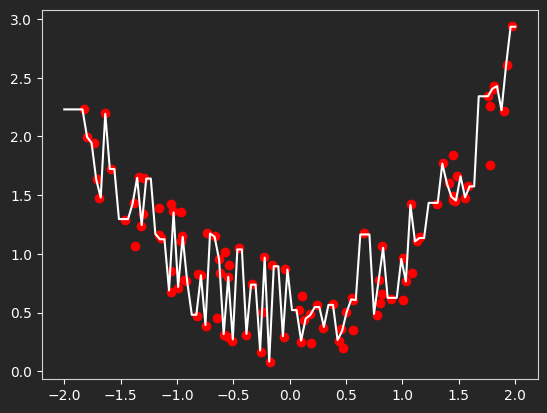

In [36]:
gbr2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.5)
gbr2.fit(X, y)
y_pred_gbr2 = gbr2.predict(X_pred)
plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred_gbr2, 'w-')

#### Finding optimal number of predictors

In [37]:
from sklearn.metrics import mean_squared_error

gbr = GradientBoostingRegressor(max_depth=2, warm_start=True)
X_train, X_val, y_train, y_val = train_test_split(X, y.reshape(-1,))
min_error = float('inf')
error_increasing = 0

# Early Stopping
for n_estimator in range(1, 200):
    gbr.n_estimators_ = n_estimator
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    print(error)
    if error >= min_error:
        error_increasing += 1
        if error_increasing == 5:
            print(n_estimator)
            break
    else:
        error_increasing = 0
        min_error = error

0.10726164905780934
0.10726164905780934
0.10726164905780934
0.10726164905780934
0.10726164905780934
0.10726164905780934
6


# Stacking

In [117]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_predict

class StackEnsemble(BaseEstimator, TransformerMixin):
    def __init__(self, models, heldout_model, heldout_size=0.3):
        self.models = models
        self.heldout_model = heldout_model
        self.heldout_size = heldout_size
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        X_pred = np.stack([cross_val_predict(model, X, y, cv=5) for model in self.models], axis=1)
        self.heldout_model.fit(X_pred, y)
    
    def predict(self, X):
        X_pred = np.stack([model.predict(X) for model in self.models], axis=1)
        return self.heldout_model.predict(X_pred)

In [118]:
n_samples = 200
X = 4*np.random.rand(n_samples,1) - 2
y = 0.5*X**2 + np.random.rand(n_samples,1)

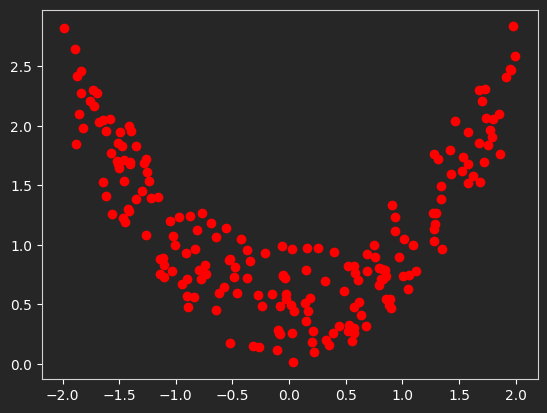

In [119]:
plt.plot(X, y, 'ro')
plt.show()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
from sklearn.svm import SVR
stk = StackEnsemble(
    [DecisionTreeRegressor(max_depth=2) for _ in range(200)],
    SVR(kernel='poly')
)
stk.fit(X_train, y_train)

/home/shaker/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
y_pred = stk.predict(X_test).reshape(-1, 1)

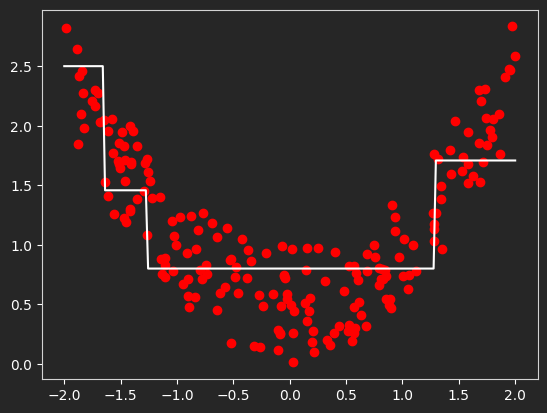

In [124]:
X_pred = np.linspace(-2, 2, 200).reshape(-1, 1)
y_pred = stk.predict(X_pred).reshape(-1, 1)
plt.plot(X, y, 'ro')
plt.plot(X_pred, y_pred, 'w-')
plt.show()

In [54]:
np.c_[y_test, y_pred]

array([[1.03893987, 0.84438109],
       [2.89095772, 1.94987068],
       [0.52096013, 0.84438109],
       [2.57966396, 2.34711506],
       [0.17250313, 0.84438109],
       [1.97521203, 2.34711506],
       [1.02409675, 0.84438109],
       [1.03155271, 0.84438109],
       [1.68986494, 0.84438109],
       [0.54569782, 0.84438109],
       [1.42432204, 0.84438109],
       [1.32892697, 0.84438109],
       [2.64254577, 2.34711506],
       [0.71161485, 0.84438109],
       [0.72609795, 0.84438109],
       [1.59724917, 0.84438109],
       [1.12728018, 0.84438109],
       [0.91923471, 0.84438109],
       [0.12233621, 0.84438109],
       [1.53821668, 0.84438109],
       [0.84836159, 0.84438109],
       [0.56720332, 0.84438109],
       [0.95646584, 0.84438109],
       [1.04018454, 0.84438109],
       [1.91121706, 1.94987068],
       [1.31735987, 0.84438109],
       [1.01126172, 0.84438109],
       [0.92699311, 0.84438109],
       [0.4336151 , 0.84438109],
       [0.85593776, 0.84438109],
       [1.